FIAP 

# Checkpoint 06

Faça o exercício abaixo <font color="red">em grupos de até 4 pessoas</font>, para praticar o uso de `sistemas de recomendação`. Utilize os conceitos vistos em aula, e consulte documentações na internet. Em caso de dúvidas, contate o Prof. Michel.

**Entrega**: 28/outubro/2022, via Teams - IMPORTANTE: renomeie o notebook incluindo seu nome! 


## Apresentação do trabalho

Neste checkpoint vamos criar um `sistema de recomendação`. Um sistema de recomendação raramente é constituído por apenas uma forma de atribuir produtos aos usuários, mas uma combinação de estratégias distintas para permitir maior alcance de usuários impactados, mais itens sendo explorados e também gerar diversidade nas recomendações. 

As principais estratégias são: 

- Regras de associação
- Filtragem colaborativa
- Filtragem por conteúdo
- Popularidade
- Jornada do usuário e outras relativas ao problema de negócio

<font color="CC0099">Seu desafio neste trabalho é responder a seguinte questão: _Dado um usuário, quais itens posso recomendar?_</font>. Espero que vocês implementem **2 estratégias distintas** para as recomendações. Podem usar aquelas da lista acima ou outras que acharem pertinente (criatividade!).

**Dataset**: vamos usar o dataset de [Recomendações de Filmes](https://www.kaggle.com/rounakbanik/the-movies-dataset). Existem diversos no Kaggle, mas este possui uma volumetria e features interessantes!

Vejam a descrição dos dados abaixo. Vocês não são obrigados a usarem todas as informações! Sejam criativos! Mais informações podem ser encontradas no Kaggle:

- `movies_metadata.csv`: The main Movies Metadata file. Contains information on 45,000 movies featured in the Full MovieLens dataset. Features include posters, backdrops, budget, revenue, release dates, languages, production countries and companies.

- `keywords.csv`: Contains the movie plot keywords for our MovieLens movies. Available in the form of a stringified JSON Object.

- `credits.csv`: Consists of Cast and Crew Information for all our movies. Available in the form of a stringified JSON Object.

- `links.csv`: The file that contains the TMDB and IMDB IDs of all the movies featured in the Full MovieLens dataset.

- `links_small.csv`: Contains the TMDB and IMDB IDs of a small subset of 9,000 movies of the Full Dataset.

- `ratings_small.csv`: The subset of 100,000 ratings from 700 users on 9,000 movies.

**Critérios de avaliação**: A correção do checkpoint será feita mediante os seguintes critérios:
- completude do projeto
- emprego adequado dos conceitos vistos em sala
- criatividade para compor recomendações diversificadas 


# Participantes do grupo

- Cesar Norena Pachon - RM95093
- Eduardo Matos da Silva - RM92877
- Matias Cornelsen Herklotz - RM94199
- Icaro Figaro Araujo - RM93571

In [1176]:
import json

import pandas
from apyori import apriori

In [1177]:
movies = pandas.read_csv("datasets/movies_metadata.csv")
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

/var/folders/5x/yzshlnrx1kn6kmfp8bz1pvd80000gn/T/ipykernel_24067/1215038427.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  movies = pandas.read_csv("datasets/movies_metadata.csv")


In [1178]:
movies.sample(10)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
8325,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",NaN,27899,tt0021079,en,Little Caesar,"A small-time hood shoots his way to the top, b...",...,1931-01-09,0.0,79.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Power-Mad Monarch of the Murder Mobs!,Little Caesar,False,6.9,63.0
14873,False,NaN,25000000,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",NaN,22971,tt0989757,en,Dear John,Sergeant John Tyree is home on a 2 week leave ...,...,2010-02-04,114977104.0,115.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Love brought them together. Will fate tear the...,Dear John,False,6.6,1302.0
42126,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 53, 'name...",NaN,92940,tt0107810,en,Perry Mason: The Case of the Wicked Wives,"Anthony Caruso, an old friend of Perry Mason, ...",...,1993-12-17,0.0,96.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Perry Mason: The Case of the Wicked Wives,False,7.0,1.0
30764,False,NaN,0,"[{'id': 37, 'name': 'Western'}]",NaN,61594,tt0068657,it,Il grande duello,A grizzled ex-sheriff helps a man framed for m...,...,1972-12-29,0.0,98.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,"A one man Judge, Jury and Executioner who turn...",The Grand Duel,False,5.8,22.0
432,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 35, 'nam...",NaN,26261,tt0109480,en,Cops & Robbersons,Hard-as-nails cop Jake Stone moves in with the...,...,1994-04-15,0.0,93.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Cops & Robbersons,False,5.0,36.0
29104,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 35, 'nam...",NaN,53435,tt0079520,en,"A Man, a Woman and a Bank",Two novice thieves are plotting to rob a bank ...,...,1979-09-28,0.0,100.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The two least likely bank robbers in the known...,"A Man, a Woman and a Bank",False,6.3,4.0
39391,False,NaN,75,"[{'id': 99, 'name': 'Documentary'}]",http://www.pondhockeymovie.com/,209645,tt1254969,en,Pond Hockey,The pond. This is where hockey was born-under ...,...,2008-08-12,0.0,82.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The pond. This is where hockey was born-under ...,Pond Hockey,False,0.0,0.0
5811,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 35, 'nam...",NaN,10856,tt0220580,es,Intacto,An enigmatic tale of four people whose lives a...,...,2001-11-06,0.0,108.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Some are born with luck. Others gamble for it.,Intacto,False,6.7,48.0
30305,False,NaN,3600000,"[{'id': 35, 'name': 'Comedy'}, {'id': 27, 'nam...",http://www.paranormalwhacktivity.com/,217787,tt1757831,en,Paranormal Whacktivity,A sexy and hilarious spoof about a couple who ...,...,2013-07-24,0.0,89.0,[],Released,NaN,Paranormal Whacktivity,False,3.3,16.0
7127,False,"{'id': 201930, 'name': 'Blacula Collection', '...",500000,"[{'id': 27, 'name': 'Horror'}, {'id': 53, 'nam...",NaN,30566,tt0068284,en,Blacula,An 18th century African prince is turned into ...,...,1972-08-25,0.0,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Blacula! - Dracula's Soul Brother!,Blacula,False,5.7,41.0


In [1179]:
# Fix number columns

def to_numeric(dataset, column, errors="coerce"):
    dataset[column] = pandas.to_numeric(dataset[column], errors)


to_numeric(movies, "popularity")
to_numeric(movies, "budget")

In [1180]:
movies.describe()

,budget,popularity,revenue,runtime,vote_average,vote_count
count,4.546300e+04,45460.000000,4.546000e+04,45203.000000,45460.000000,45460.000000
mean,4.224579e+06,2.921478,1.120935e+07,94.128199,5.618207,109.897338
std,1.742413e+07,6.005414,6.433225e+07,38.407810,1.924216,491.310374
min,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,0.000000e+00,0.385948,0.000000e+00,85.000000,5.000000,3.000000
50%,0.000000e+00,1.127685,0.000000e+00,95.000000,6.000000,10.000000
75%,0.000000e+00,3.678902,0.000000e+00,107.000000,6.800000,34.000000
max,3.800000e+08,547.488298,2.787965e+09,1256.000000,10.000000,14075.000000


In [1181]:
# Single quotes cause an error when reading as JSON value
movies["genres"] = movies["genres"].apply(lambda e: e.replace("'", '"'))

categories = movies["genres"].apply(json.loads).values.tolist()
categories = [category for c in categories for category in c]
categories = pandas.DataFrame.from_dict(categories).drop_duplicates().sort_values(["name"])

categories["name"] = categories["name"].str.lower()

categories

,id,name
12,28,action
3,12,adventure
0,16,animation
62872,2883,aniplex
62874,7760,brosta tv
44572,11176,carousel productions
1,35,comedy
13,80,crime
190,99,documentary
9,18,drama


In [1182]:
# ratings = pandas.read_csv("datasets/ratings_small.csv")
ratings = pandas.read_csv("datasets/ratings.csv")
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26024289 entries, 0 to 26024288
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 794.2 MB


In [1183]:
ratings.sample(10)

,userId,movieId,rating,timestamp
13985776,145350,266,4.0,840786276
25366851,264071,2586,3.0,1048688407
23125252,240069,160,4.0,833129020
21379116,222057,136469,4.5,1474915196
14561702,151317,2371,4.0,1126761413
2015262,20962,1356,4.0,952662978
23796715,247060,58559,5.0,1379379180
24293131,252318,260,4.0,865603017
13146583,136599,74868,2.5,1300916834
14023104,145698,413,2.5,1068701052


In [1184]:
ratings.describe()

,userId,movieId,rating,timestamp
count,2.602429e+07,2.602429e+07,2.602429e+07,2.602429e+07
mean,1.350371e+05,1.584911e+04,3.528090e+00,1.171258e+09
std,7.817620e+04,3.108526e+04,1.065443e+00,2.052889e+08
min,1.000000e+00,1.000000e+00,5.000000e-01,7.896520e+08
25%,6.716400e+04,1.073000e+03,3.000000e+00,9.907545e+08
50%,1.351630e+05,2.583000e+03,3.500000e+00,1.151716e+09
75%,2.026930e+05,6.503000e+03,4.000000e+00,1.357578e+09
max,2.708960e+05,1.762750e+05,5.000000e+00,1.501830e+09


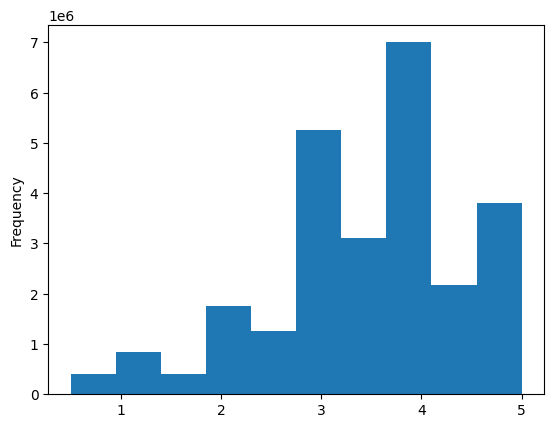

In [1185]:
ratings["rating"].plot.hist();

In [1186]:
good_ratings = ratings[ratings["rating"] >= 4.5]
good_ratings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5982940 entries, 1 to 26024287
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 228.2 MB


In [1187]:
good_movies_by_user = good_ratings[["userId", "movieId"]].groupby("userId")["movieId"].apply(list)
good_movies_by_user = pandas.DataFrame(good_movies_by_user).reset_index()
good_movies_by_user

,userId,movieId
0,1,"[147, 858, 1221, 1246, 2762, 2918, 4878, 5577,..."
1,2,"[339, 1356]"
2,4,"[1097, 1221, 2023, 2396, 2762, 3114, 3408]"
3,5,"[541, 750, 858, 908, 1193, 1201, 1204, 1230, 1..."
4,6,[2628]
...,...,...
248157,270892,"[260, 296, 318, 364, 858, 1172, 1196, 1198, 20..."
248158,270893,"[47, 50, 110, 318, 431, 527, 593, 733, 750, 91..."
248159,270894,"[593, 608, 1090, 1193, 1214, 1387, 2288, 2571,..."
248160,270895,"[150, 318, 344, 356, 357, 454, 527, 590, 597]"


In [1188]:
# Basic statics about users count of ratings
good_movies_by_user["movieId"].apply(len).describe()

count    248162.000000
mean         24.109009
std          43.396655
min           1.000000
25%           4.000000
50%           9.000000
75%          27.000000
max        1938.000000
Name: movieId, dtype: float64

In [1189]:
recommendation_rules = list(apriori(good_movies_by_user["movieId"]))

In [1190]:
def pretty_recommendation(e):
    return {
        "movieId": [x for x in e.items],
        "support": e.support,
        "confidence": e[2][0].confidence
    }

In [1191]:
recommendations = map(lambda e: pretty_recommendation(e), recommendation_rules)
recommendations = pandas.DataFrame(recommendations).sort_values(by=["support", "confidence"], ascending=False)
recommendations

,movieId,support,confidence
4,[318],0.235644,0.235644
3,[296],0.187789,0.187789
5,[356],0.161656,0.161656
11,[2571],0.160008,0.160008
7,[593],0.155487,0.155487
2,[260],0.152509,0.152509
6,[527],0.149140,0.149140
8,[858],0.140094,0.140094
13,[2959],0.135129,0.135129
0,[50],0.132506,0.132506


In [1192]:
def get_recommendation_list(index, _recommendations=recommendations):
    return _recommendations.iloc[[index]]["movieId"].iloc[0]

In [1193]:
def find_movies_by(id_list, _movies=movies):
    result = pandas.DataFrame()
    for _id in id_list:
        movie = _movies[_movies["id"] == str(_id)]
        if not movie.empty:
            result = pandas.concat([result, movie])
    return result

In [1194]:
r_list = get_recommendation_list(0)
find_movies_by(r_list)[["id", "title"]]

,id,title
4020,318,The Million Dollar Hotel


In [1195]:
r_list = get_recommendation_list(1)
find_movies_by(r_list)[["id", "title"]]

,id,title
6388,296,Terminator 3: Rise of the Machines


In [1196]:
r_list = get_recommendation_list(4)
find_movies_by(r_list)[["id", "title"]]

,id,title
3382,593,Solaris
